<a href="https://colab.research.google.com/github/ahmedjajan93/nlp-preprocessing/blob/main/Natural_Language_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [5]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [7]:
len(all_positive_tweets),len(all_negative_tweets)

(5000, 5000)

In [9]:
type(all_positive_tweets),type(all_negative_tweets[0])

(list, str)

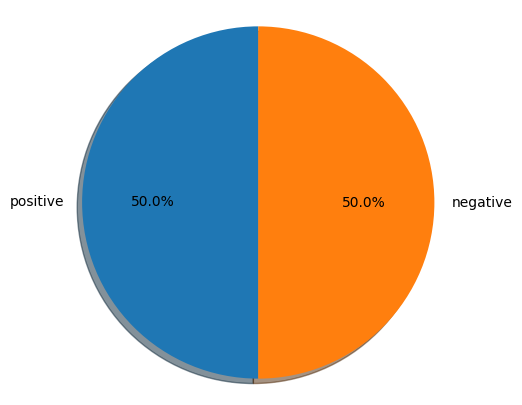

In [11]:
fig  = plt.figure(figsize=(5,5))
lables = 'positive', 'negative'
sizes = [len(all_positive_tweets),len(all_negative_tweets)]
plt.pie(sizes,labels=lables,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.show()

In [16]:
print('\033[92m]'+all_positive_tweets[random.randint(0,5000)])
print('\033[91m]'+all_negative_tweets[random.randint(0,5000)])

]@santosmarkaljon @InsidiousMovie I'm not Stefanie ... This &gt; @StefanieScott is the real one :)
]@RyanBitchTits they feel and look better where people can't see tbh
They look so tacky :((


In [17]:
tweet = all_positive_tweets[2255]
print(tweet)

New story illustration for your visual pleasure. Thanks for looking :) https://t.co/zIITPKlIPz


In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [20]:
tweet2 = re.sub(r'^RT[\s]+','',tweet)
tweet2

'New story illustration for your visual pleasure. Thanks for looking :) https://t.co/zIITPKlIPz'

In [21]:
tweet2 = re.sub(r'https?://[^\s\n\r]+','',tweet2)

In [22]:
tweet2

'New story illustration for your visual pleasure. Thanks for looking :) '

In [23]:
tweet2 = re.sub(r'#','',tweet2)
tweet2

'New story illustration for your visual pleasure. Thanks for looking :) '

In [24]:
tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)
tweet_tokens

['new',
 'story',
 'illustration',
 'for',
 'your',
 'visual',
 'pleasure',
 '.',
 'thanks',
 'for',
 'looking',
 ':)']

In [25]:
stopwords_english = stopwords.words('english')
stopwords_english

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
tweets_clean = []
for word in tweet_tokens:
  if (word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)
tweets_clean


['new',
 'story',
 'illustration',
 'visual',
 'pleasure',
 'thanks',
 'looking',
 ':)']

In [28]:
stemmer = PorterStemmer()
tweets_stem  = []
for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stem.append(stem_word)
tweets_stem

['new', 'stori', 'illustr', 'visual', 'pleasur', 'thank', 'look', ':)']

In [34]:
import numpy as np
from utils import process_tweet, build_freqs
tweet = all_positive_tweets[2255]
process_tweet(tweet)
ys = np.array([1, 0, 0, 1])
build_freqs(all_positive_tweets,ys )


{('followfriday', 1): 1,
 ('top', 1): 1,
 ('engag', 1): 1,
 ('member', 1): 1,
 ('commun', 1): 1,
 ('week', 1): 1,
 (':)', 1): 2,
 ('hey', 0): 1,
 ('jame', 0): 1,
 ('odd', 0): 1,
 (':/', 0): 1,
 ('pleas', 0): 1,
 ('call', 0): 1,
 ('contact', 0): 1,
 ('centr', 0): 1,
 ('02392441234', 0): 1,
 ('abl', 0): 1,
 ('assist', 0): 1,
 (':)', 0): 2,
 ('mani', 0): 1,
 ('thank', 0): 1,
 ('listen', 0): 1,
 ('last', 0): 1,
 ('night', 0): 1,
 ('bleed', 0): 1,
 ('amaz', 0): 1,
 ('track', 0): 1,
 ('scotland', 0): 1,
 ('congrat', 1): 1}

In [ ]:
import pandas as pd